Emily Farr

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy.table import QTable

from scipy.optimize import curve_fit

# Power on the Moon

<img src="images/ApolloRTG.jpg" alt="Apollo_ALSEP_RTG" style="width: 500px;"/>

The Apollo lunar mission deployed a series of experiments on the Moon, The experiment package
was called the Apollo Lunar Surface Experiments Package (ALSEP). The ALSEP was powered by a radioisotope 
thermoelectric generator (RTG). 

An RTG is basically a fist-sized
slug of Pu-238 wrapped in a material that generates electric power when heated. Since the RTG is powered
by a radioisotope, the output power decreases over time as the radioisotope decays.

## Read in the datafile

The data file `Apollo_RTG.csv` contains the power output of the Apollo 12 RTG as a function of time.

The data colunms are

* [Day] - Days on the Moon
* [Power] - RTG power output in Watts

In [15]:
D1 = QTable.read('Apollo_RTG.csv', format='ascii.csv')

## Can you charge your phone with the Apollo RTG?

* Plot the data: Day vs. Power
* Use the OO interface to matplotlib
* Fit the function with a polynomial (you choose the degree).
* Plot the fit with the data
- Output size w:11in, h:8.5in
- Make the plot look nice (including clear labels)

In [4]:
zero_power = 4166.58 / 365
power_in_years = 1939.78 / 365
USB_power = 4032.72 / 365

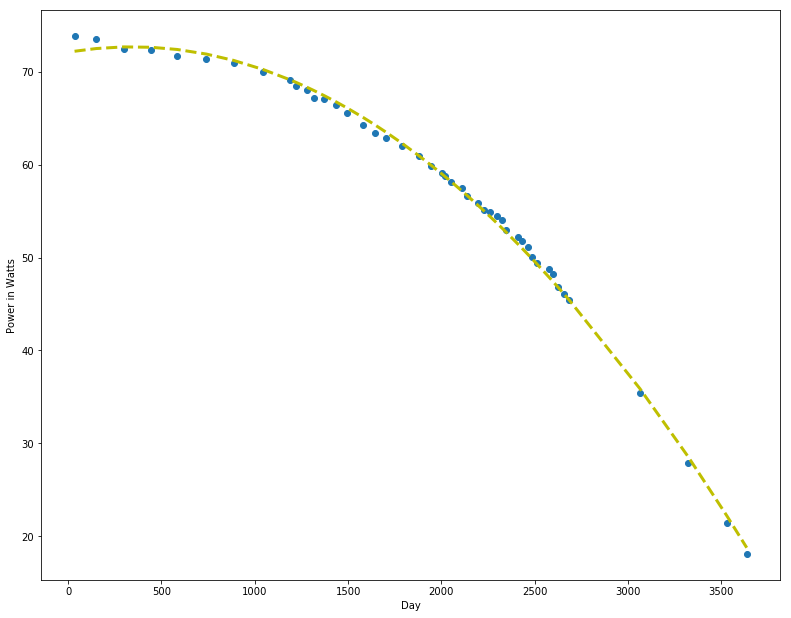

In [5]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)

fig.tight_layout()

ax.set_xlabel("Day")
ax.set_ylabel("Power in Watts")

ax.scatter(D1['Day'],D1['Power']);

Fit1 = np.polyfit(D1['Day'],D1['Power'],2)
Yfit = np.polyval(Fit1,D1['Day'])
ax.plot(D1['Day'], Yfit, linewidth=3, color='y', linestyle='--');

## What was the power output on Day 0?

In [6]:
poly02 = np.poly1d(Fit1)
power_out_day_zero = poly02(0)
my_string = "The Power output on day zero is {0:.2f} watts".format(power_out_day_zero)
print(my_string)

The Power output on day zero is 72.07 watts


## How many years after landing could you still power a 60 W lightbulb?

In [7]:
(poly02 - 60).roots

array([ 1939.77458322, -1251.12039521])

In [8]:
my_string = "A 60 watt lightbulb could be powered {0:.2f} years after landing".format(power_in_years)
print(my_string)

A 60 watt lightbulb could be powered 5.31 years after landing


## How many years after landing could you still power a 5 W USB device?

In [9]:
(poly02 - 5).roots

array([ 4032.72070124, -3344.06651322])

In [10]:
my_string = "A 5 watt USB could be powered {0:.2f} years after landing".format(USB_power)
print(my_string)

A 5 watt USB could be powered 11.05 years after landing


## How many years after landing until the power output is 0 W?

In [11]:
poly02.roots

array([ 4166.57674253, -3477.92255451])

In [12]:
my_string = "The ALSEP will run out of power {0:.2f} years after landing".format(zero_power)
print(my_string)

The ALSEP will run out of power 11.42 years after landing


---

# Fitting data to a function

* The datafile 'FitMe.dat' contains two columns of data (x,y)
* Use the OO interface to matplotlib
* Plot the data x,y
* Fit the function below to the data
* Find the values of a,b,c that best fit the data
- Output size w:11in, h:8.5in
- Make the plot look nice (including clear labels)

$$\Large f(x) = a \sin(bx) \ e^{-cx} $$

In [40]:
D2 = QTable.read('FitMe.csv', format='ascii.csv')

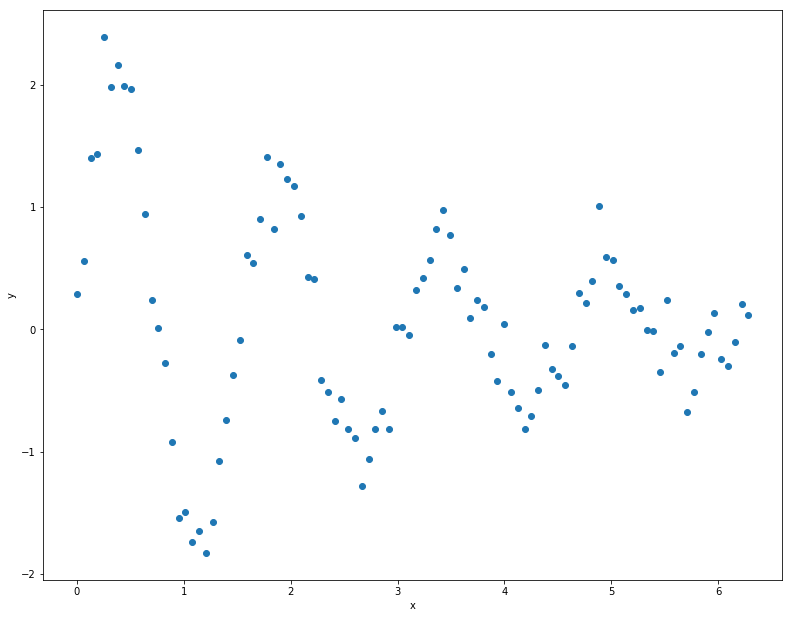

In [56]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)

fig.tight_layout()

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(D2['x'],D2['y']);

In [57]:
def sine(x,a,b,c):
    return (a*np.sin(b*x)) * np.e **(-c*x)

In [58]:
Aguess = 3
Bguess = 4
Cguess = 0.45

fitpars, error = curve_fit(sine,D2['x'],D2['y'],p0=[Aguess,Bguess,Cguess])
print(fitpars)

[ 2.53354134  4.11112395  0.34632231]


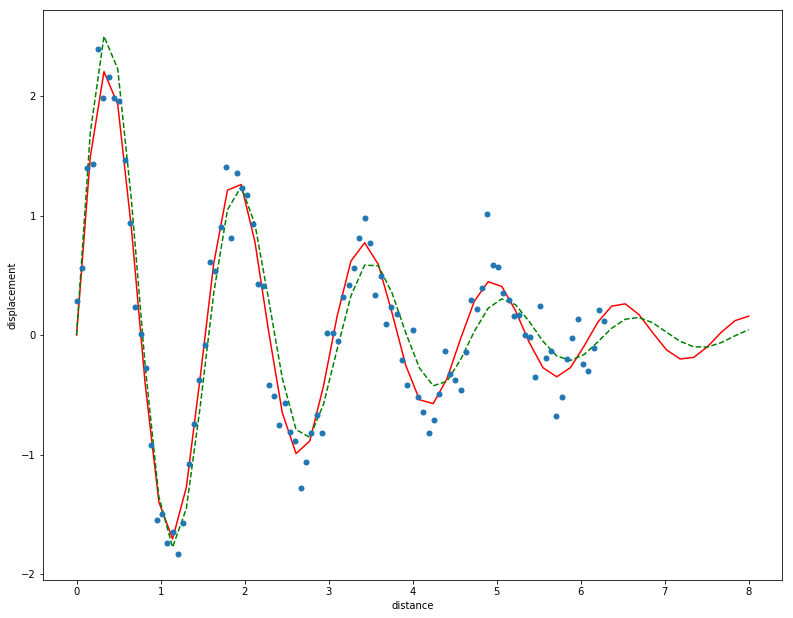

In [61]:
Z = np.linspace(0,8)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)

fig.tight_layout()

ax.set_xlabel("distance")
ax.set_ylabel("displacement")

ax.plot(Z, sine(Z, *fitpars), 'r-')
ax.plot(Z, sine(Z,Aguess,Bguess,Cguess), 'g--')

ax.plot(D2['x'],D2['y'],marker="o",linestyle="None",markersize=5);

### Due Tue Nov 07 - 5pm
- `Make sure to change the filename to your name!`
- `Make sure to change the Title to your name!`
- `File -> Download as -> HTML (.html)`
- `upload your .html and .ipynb file to the class Canvas page`  